In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
import scipy.stats as st
import statsmodels.api as sm 
import pylab as py 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor



In [7]:
df = pd.read_csv(' https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/ames2.csv', na_values=['NA', '?'])
df.dropna(inplace=True)
df.head()

,LotArea,GrLivArea,OverallQual,FullBath,TotalPorchSF,BsmtFinSF1,GaragedCat,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YrSold,BsmtUnfSF,GarageArea,MoSold,PavedDrive01,MSSubClass,logSalePrice
0,9120,1820,7,2,100,329,1,8,1026,1925,2008,697,240,6,0,50,12.122691
1,4060,1337,6,2,68,266,0,5,1405,1998,2008,1139,511,8,1,120,12.106252
2,34650,1056,5,1,0,1056,0,5,1056,1955,2006,0,572,1,1,190,11.884489
3,21750,1771,5,1,0,0,0,9,0,1960,2009,0,336,11,1,20,11.652687
4,11500,845,4,1,0,0,1,5,0,1957,2009,0,290,1,0,20,11.338572


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1000 non-null   int64  
 1   GrLivArea     1000 non-null   int64  
 2   OverallQual   1000 non-null   int64  
 3   FullBath      1000 non-null   int64  
 4   TotalPorchSF  1000 non-null   int64  
 5   BsmtFinSF1    1000 non-null   int64  
 6   GaragedCat    1000 non-null   int64  
 7   TotRmsAbvGrd  1000 non-null   int64  
 8   TotalBsmtSF   1000 non-null   int64  
 9   YearBuilt     1000 non-null   int64  
 10  YrSold        1000 non-null   int64  
 11  BsmtUnfSF     1000 non-null   int64  
 12  GarageArea    1000 non-null   int64  
 13  MoSold        1000 non-null   int64  
 14  PavedDrive01  1000 non-null   int64  
 15  MSSubClass    1000 non-null   int64  
 16  logSalePrice  1000 non-null   float64
dtypes: float64(1), int64(16)
memory usage: 132.9 KB


In [12]:
# Display the correlation matrix for the dataframe
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

               LotArea  GrLivArea  OverallQual  FullBath  TotalPorchSF  \
LotArea       1.000000   0.271826     0.124242  0.155140      0.089529   
GrLivArea     0.271826   1.000000     0.610830  0.639111      0.255120   
OverallQual   0.124242   0.610830     1.000000  0.579177      0.174789   
FullBath      0.155140   0.639111     0.579177  1.000000      0.083149   
TotalPorchSF  0.089529   0.255120     0.174789  0.083149      1.000000   
BsmtFinSF1    0.174474   0.136687     0.215519  0.080169      0.019961   
GaragedCat   -0.130252  -0.103092    -0.246449 -0.213392     -0.006152   
TotRmsAbvGrd  0.190936   0.842012     0.461186  0.542785      0.173314   
TotalBsmtSF   0.235157   0.403473     0.539971  0.340306      0.130104   
YearBuilt     0.036196   0.220854     0.557037  0.505925     -0.135091   
YrSold       -0.023266   0.016548    -0.005187  0.046511     -0.037365   
BsmtUnfSF     0.030978   0.242545     0.311923  0.266291      0.073482   
GarageArea    0.202571   0.462122     

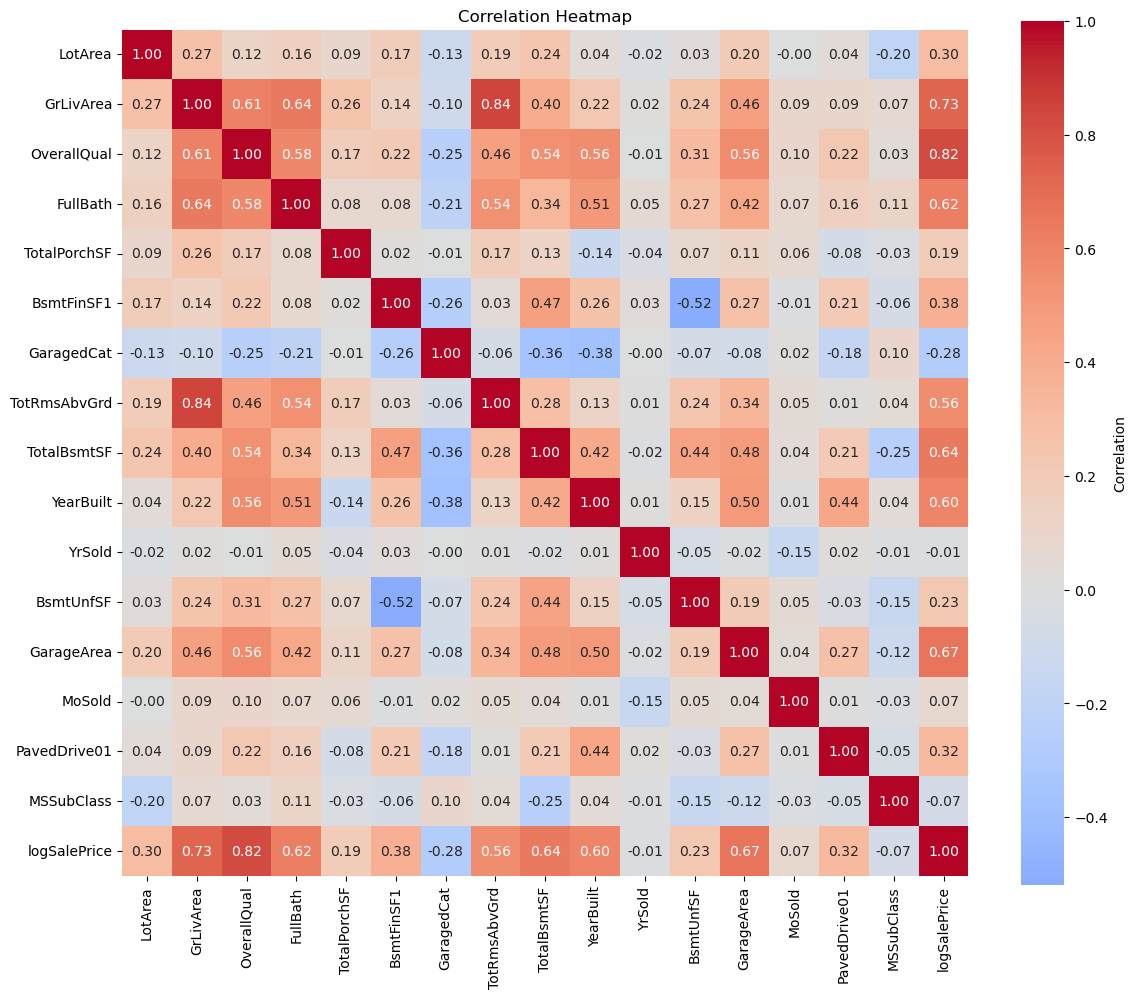

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [22]:
# Prepare features and target
X = df[features]
y = df['logSalePrice']

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate performance metrics
rmse = root_mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"  {feature}: {coef:.6f}")
print(f"  Intercept: {model.intercept_:.6f}")

R² Score: 0.8555
RMSE: 0.1537

Model Coefficients:
  OverallQual: 0.097696
  GrLivArea: 0.000311
  GarageArea: 0.000251
  TotalBsmtSF: 0.000114
  YearBuilt: 0.002529
  FullBath: -0.009956
  TotRmsAbvGrd: -0.005230
  BsmtFinSF1: 0.000111
  Intercept: 5.735396


In [23]:
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           logSalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     733.2
Date:                Thu, 05 Feb 2026   Prob (F-statistic):               0.00
Time:                        15:12:03   Log-Likelihood:                 453.99
No. Observations:                1000   AIC:                            -890.0
Df Residuals:                     991   BIC:                            -845.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.7354      0.441     13.018   

In [27]:
X2 = df[['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'BsmtFinSF1']]
y = df['logSalePrice']
model2 = LinearRegression()
model2.fit(X2, y)
model = sm.OLS(y, sm.add_constant(X2)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           logSalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     978.0
Date:                Thu, 05 Feb 2026   Prob (F-statistic):               0.00
Time:                        15:14:43   Log-Likelihood:                 453.27
No. Observations:                1000   AIC:                            -892.5
Df Residuals:                     993   BIC:                            -858.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.8415      0.401     14.584      

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X2.columns
vif_data["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(len(X2.columns))]